In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
base_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\commodities\soft_commodities\grains\coffee\ICEUS_DLY_KC1!, 1D.csv',index_col='time',parse_dates=True)
base_df.head()

,open,high,low,close,Commercials long,Commercials short,Commercials net,Large Speculators long,Large Speculators short,Large Speculators net,...,OI,Commercials long.1,Commercials short.1,Commercials net.1,Large Speculators long.1,Large Speculators short.1,Large Speculators net.1,Small Speculators long.1,Small Speculators short.1,Small Speculators net.1
time,,,,,,,,,,,,,,,,,,,,,
1973-08-17 08:15:00+00:00,66.8,67.00,66.35,66.85,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-08-20 08:15:00+00:00,67.8,68.00,67.30,67.35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-08-21 08:15:00+00:00,67.5,67.60,66.60,67.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-08-22 08:15:00+00:00,67.0,67.80,65.50,65.80,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-08-23 08:15:00+00:00,65.4,67.75,65.40,66.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[]

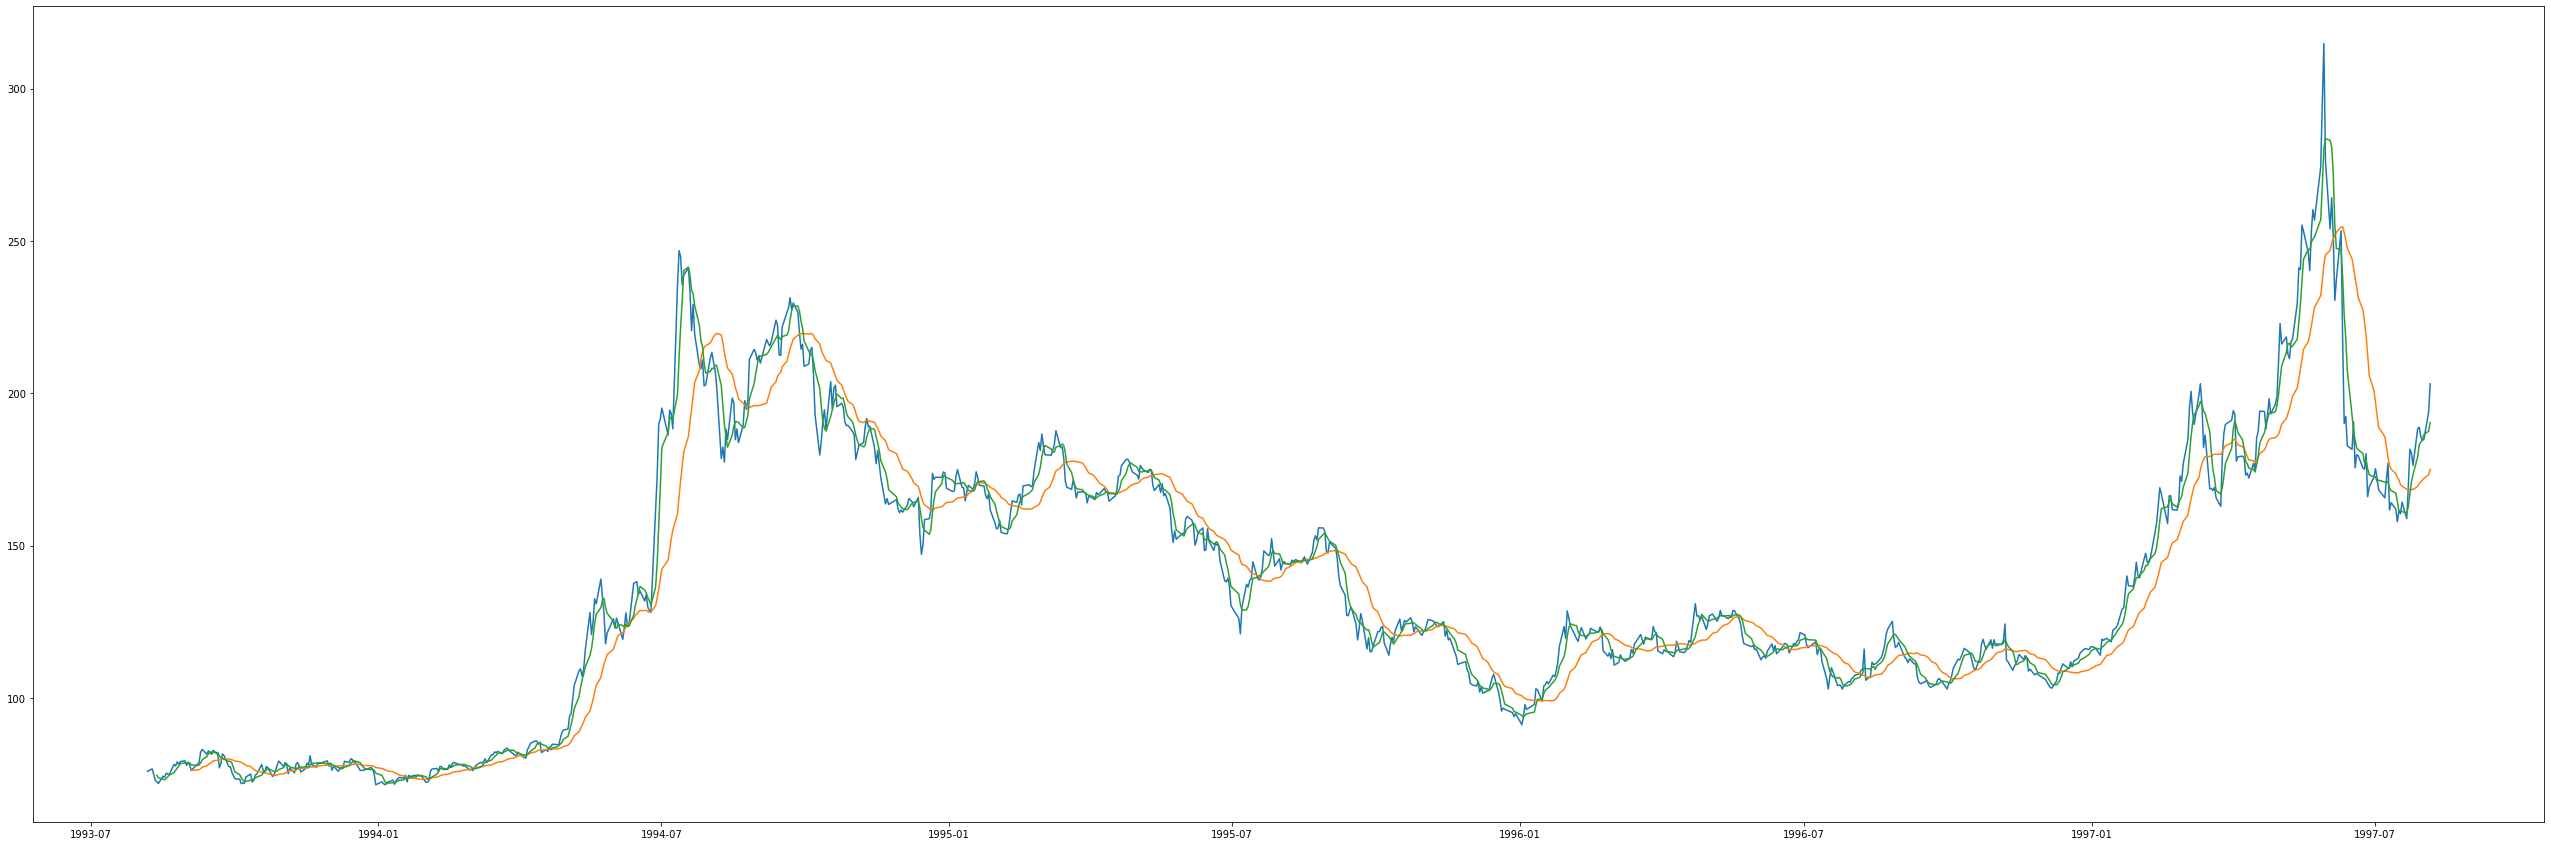

In [4]:
plt.figure(figsize=(45,15))

plt.plot(base_df['close'][5000:6000])
plt.plot(base_df['close'][5000:6000].rolling(21).mean())
plt.plot(base_df['close'][5000:6000].rolling(5).mean())

plt.plot()

In [5]:

eval_PnL = []
base_df['diff_1'] = base_df['close'].diff(1)

ma_1 = 5
ma_2 = 18

base_df['ma_1'] = base_df['close'].rolling(ma_1).mean()
base_df['ma_2'] = base_df['close'].rolling(ma_2).mean()

PnL        = []
as_of_date = []

cachePnL = {
    "as_of_date":[],
    "PnL":[],
}

reset_index = base_df.reset_index()

i = 0
while i < len(base_df):

    if base_df['ma_1'][i] >= base_df['ma_2'][i]:
        cachePnL['as_of_date'].append(reset_index['time'][i])
        cachePnL['PnL'].append(base_df['diff_1'][i])
        
    else:
        cachePnL['as_of_date'].append(reset_index['time'][i])
        cachePnL['PnL'].append(0)   
    
    i+=1

pnl_df = pd.DataFrame(cachePnL)
pnl_df['PnL'].cumsum().iloc[-1]

pnl_lst = []
pnl_lst.append(pnl_df)

eval_PnL.append({"ma_1":[ma_1],"ma_2":[ma_2],"EndPnL":[pnl_df['PnL'].cumsum().iloc[-1]],"Mean":[pnl_df['PnL'].mean()],"std":[pnl_df['PnL'].std()]})


In [6]:
print(eval_PnL)

[{'ma_1': [5], 'ma_2': [18], 'EndPnL': [1290.67], 'Mean': [0.104338722716249], 'std': [2.3959801210822187]}]


In [7]:

eval_PnL = []
base_df['diff_1'] = base_df['close'].diff(1)

ma_2 = 10

j = 0
while j < ma_2:

    tag = 0

    ma_1 = j

    base_df['ma_1'] = base_df['close'].rolling(ma_1).mean()
    base_df['ma_2'] = base_df['close'].rolling(ma_2).mean()

    cachePnL = {
        "as_of_date":[],
        "PnL":[],
    }

    reset_index = base_df.reset_index()

    i = 0
    while i < len(base_df):

        if base_df['ma_1'][i] >= base_df['ma_2'][i]:

            cachePnL['as_of_date'].append(reset_index['time'][i])
            cachePnL['PnL'].append(base_df['diff_1'][i])

            # tag to indicate that the previous day was also a trade
            tag = 1    
            
        else:

            if tag == 1:
                cachePnL['as_of_date'].append(reset_index['time'][i])
                cachePnL['PnL'].append(base_df['diff_1'][i])

                tag = 0

            else:
                cachePnL['as_of_date'].append(reset_index['time'][i])
                cachePnL['PnL'].append(0)   
            
        i+=1

    # PnL dataframe
    pnl_df = pd.DataFrame(cachePnL)

    pnl_df.to_csv(f"""{ma_1}_{ma_2}.csv""")

    # cachePnL
    pnl_lst.append(pnl_df)
    eval_PnL.append({"ma_1":[ma_1],"ma_2":[ma_2],"EndPnL":[pnl_df['PnL'].cumsum().iloc[-1]],"Mean":[pnl_df['PnL'].mean()],"std":[pnl_df['PnL'].std()]})

    j+=1


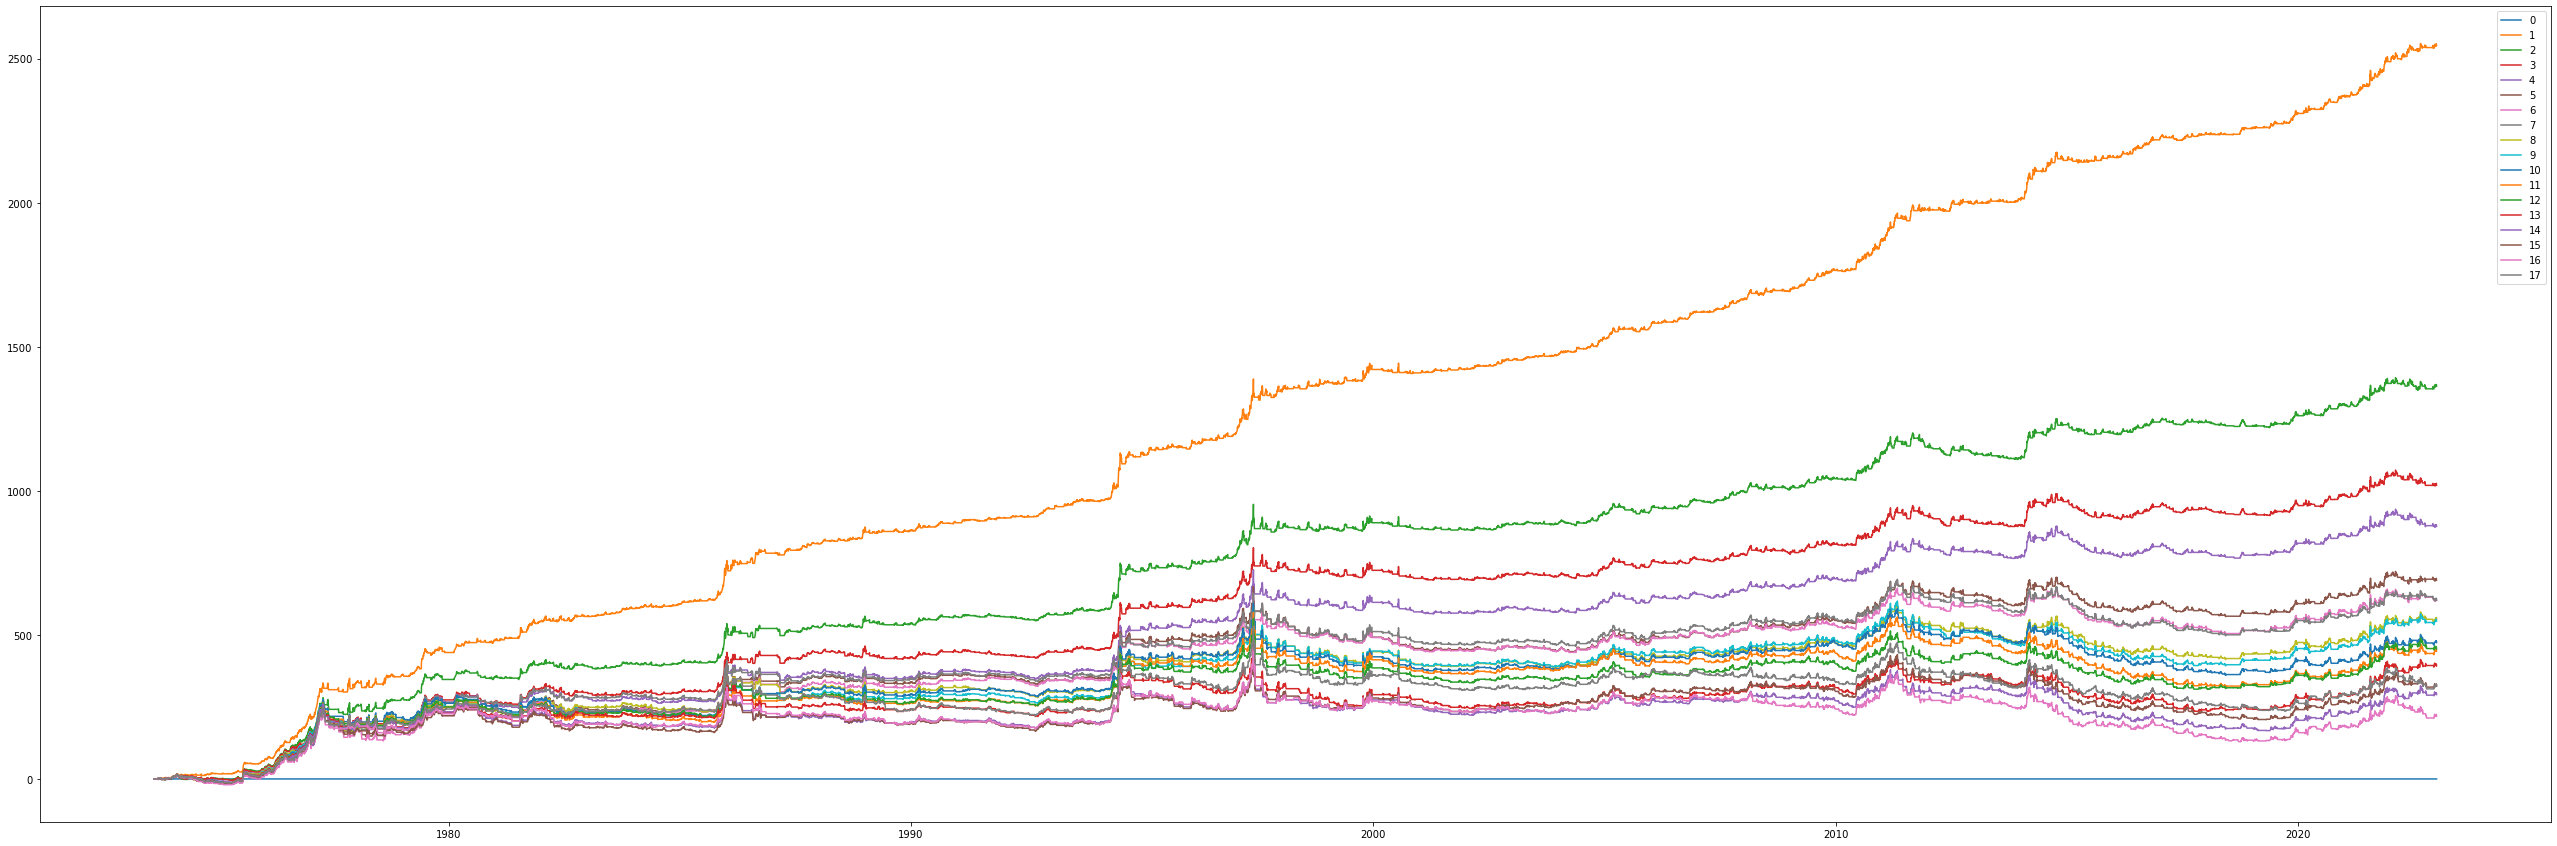

In [11]:
plt.figure(figsize=(45,15))

legend = []

for j in range(18):
    pnl_csv = pd.read_csv(f"""{j}_18.csv""",parse_dates=True,index_col='as_of_date')
    plt.plot(pnl_csv['PnL'].cumsum())

    legend.append(str(j))

plt.legend(legend)
plt.show()


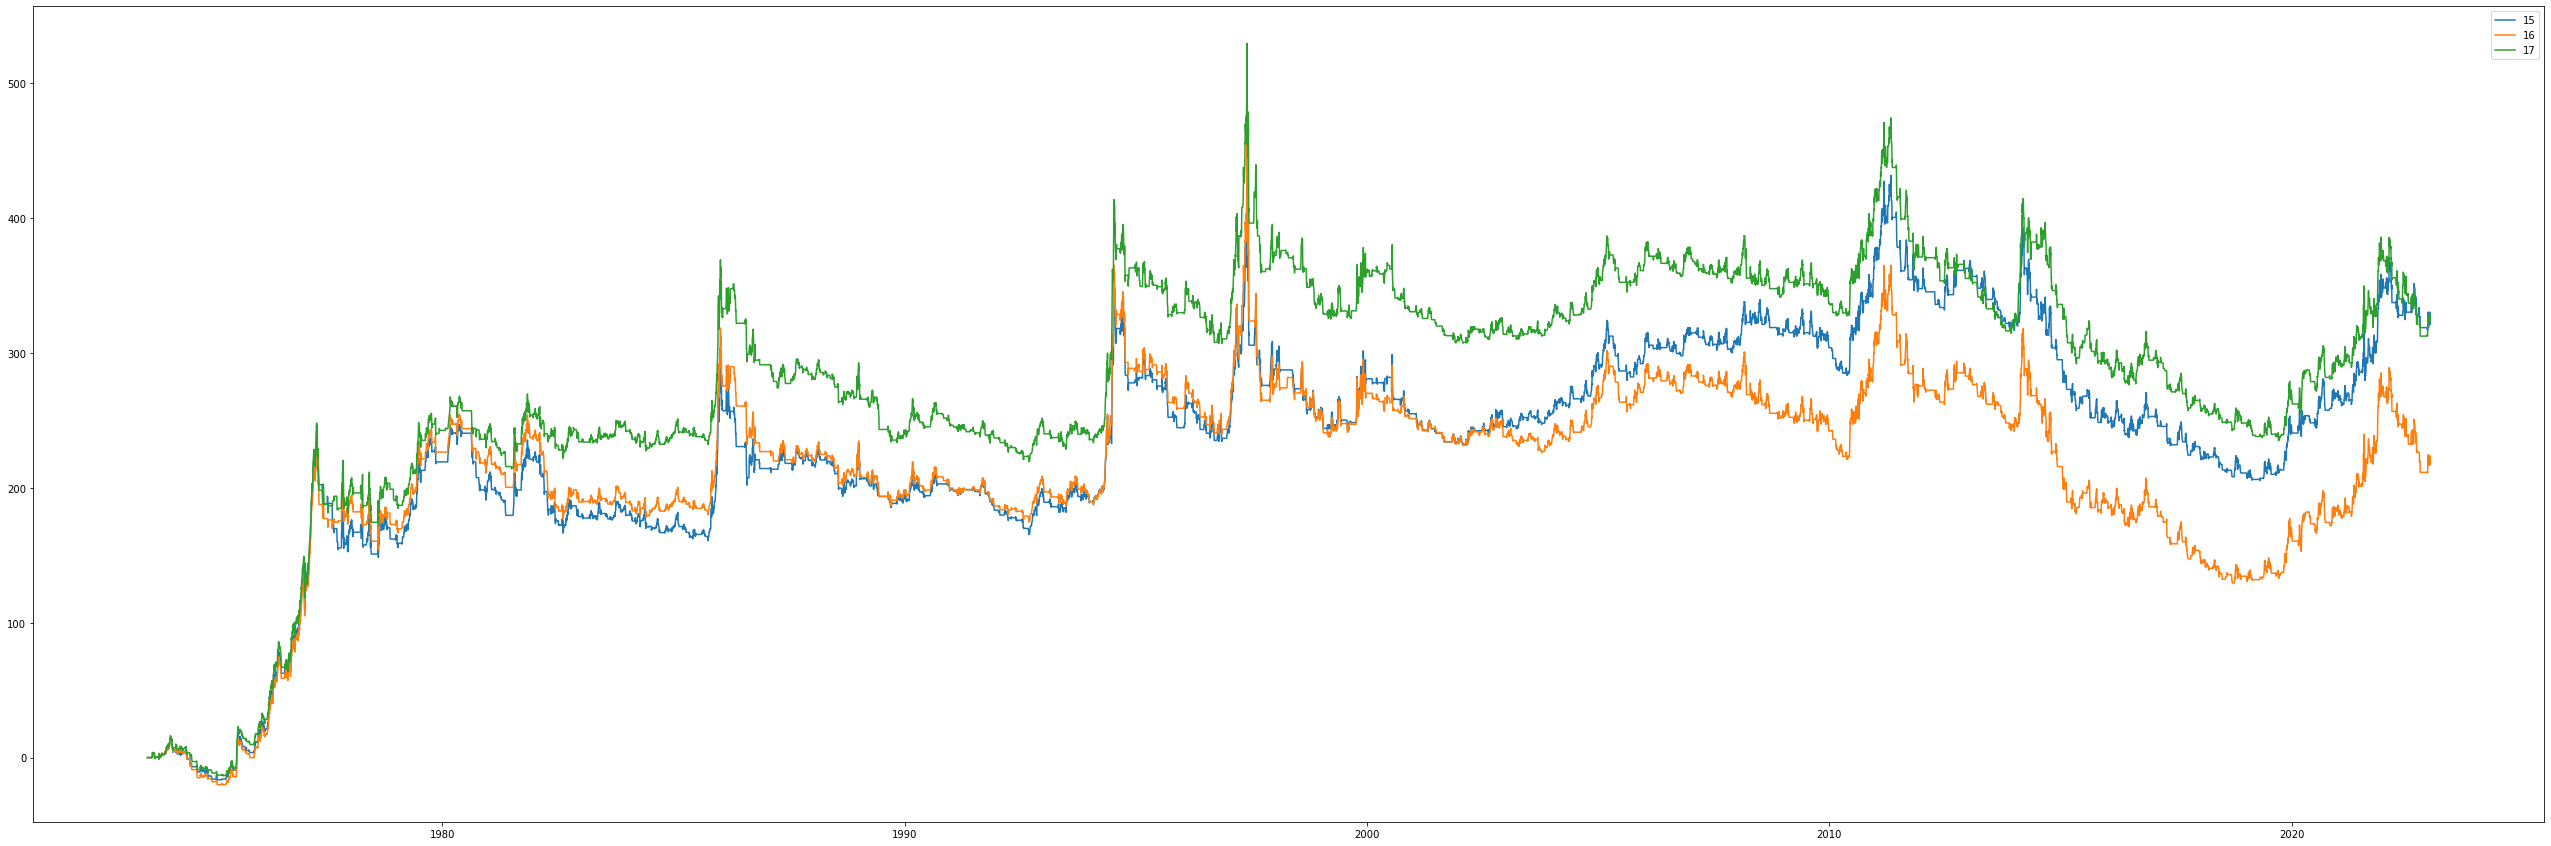

In [12]:
plt.figure(figsize=(45,15))

legend = []

for j in range(15,18):
    pnl_csv = pd.read_csv(f"""{j}_18.csv""",parse_dates=True,index_col='as_of_date')
    plt.plot(pnl_csv['PnL'].cumsum())

    legend.append(str(j))

plt.legend(legend)
plt.show()


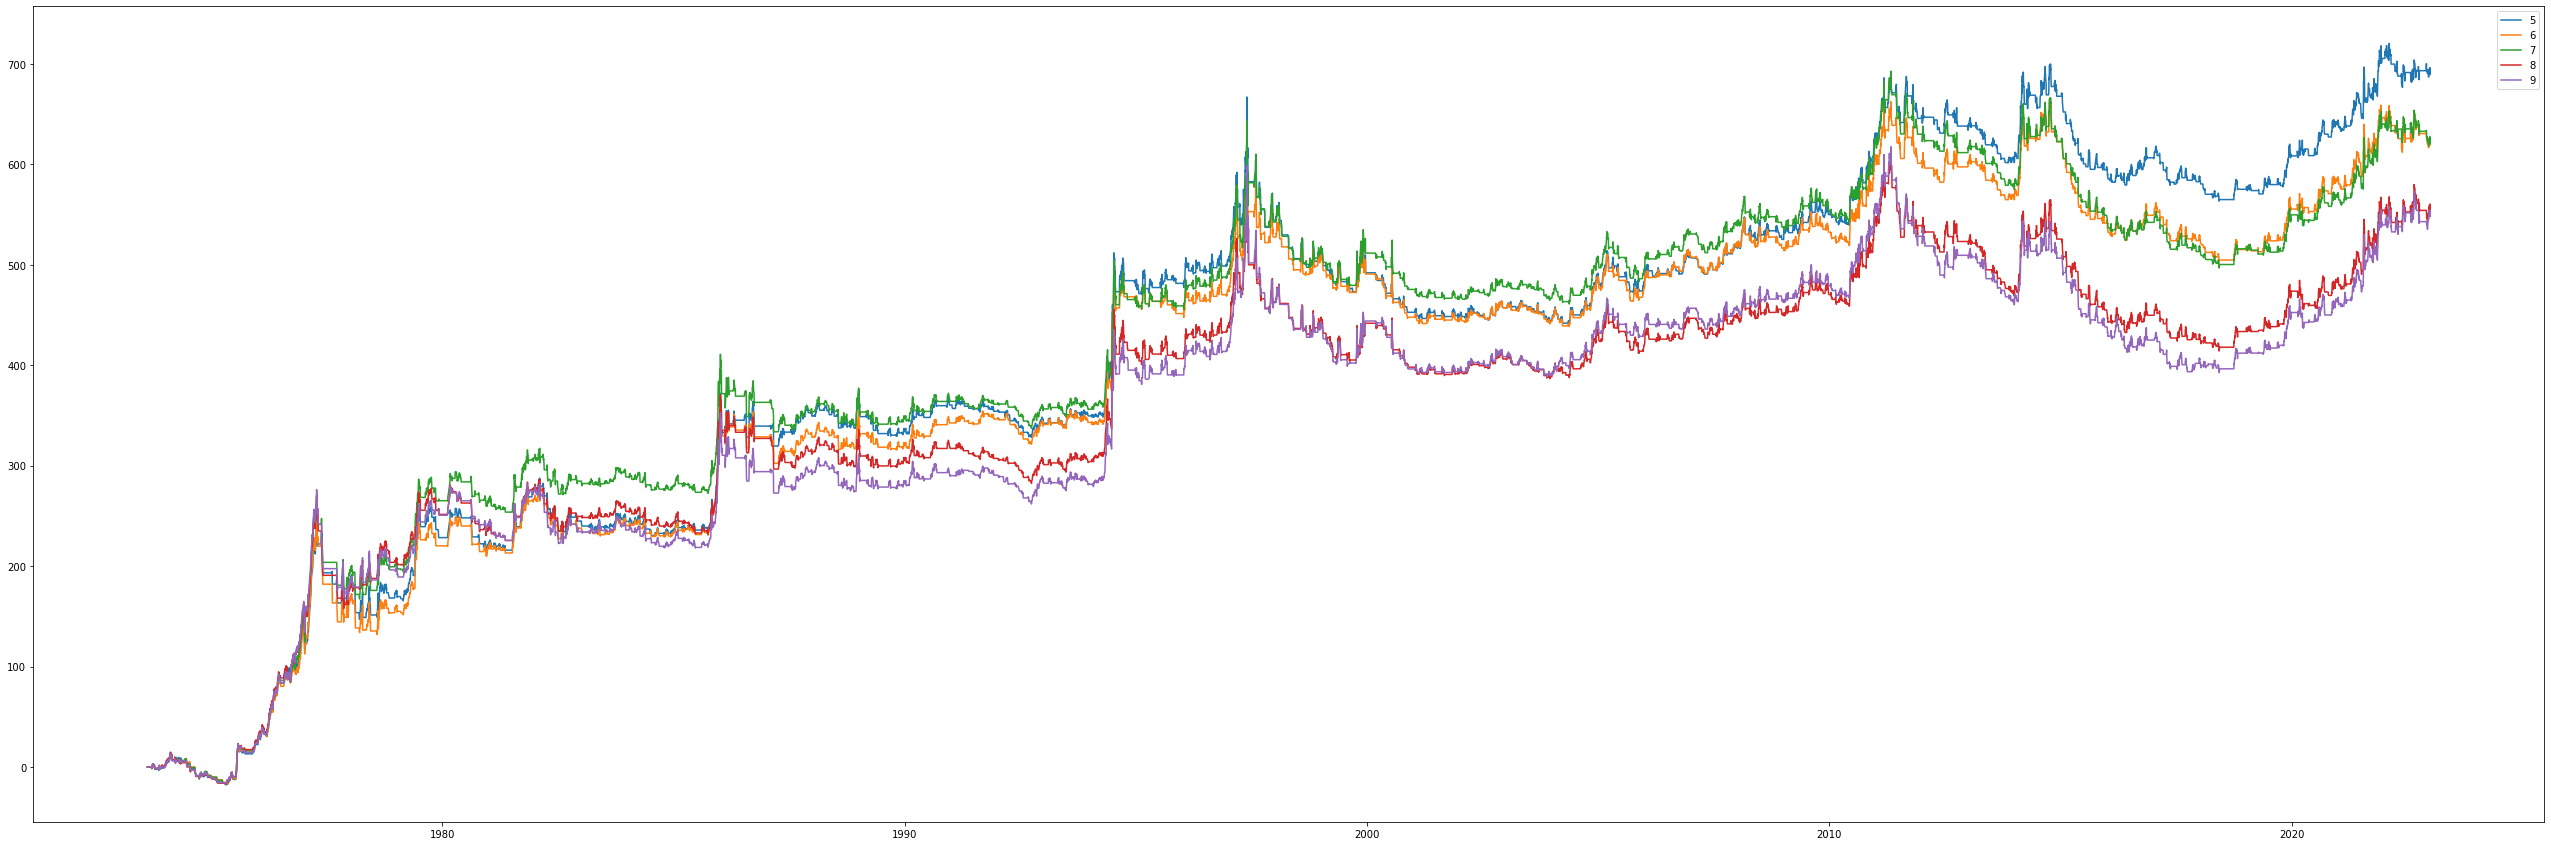

In [13]:
plt.figure(figsize=(45,15))

legend = []

for j in range(5,10):
    pnl_csv = pd.read_csv(f"""{j}_18.csv""",parse_dates=True,index_col='as_of_date')
    plt.plot(pnl_csv['PnL'].cumsum())

    legend.append(str(j))

plt.legend(legend)
plt.show()
